In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os
%matplotlib notebook

In [20]:
# 2016

# Data that I have been using:
bml_data_dir="../../data/BML data/2016/all_concatenated"

df=pd.read_csv(os.path.join(bml_data_dir,'csv','NCK_wll_concatenated.csv'))
# UTC
df['time']=pd.to_datetime( df[ ['year','month','day','hour','minute','second']])
nck_wll_stn=df
nck_wll_stn.head()

,year,month,day,hour,minute,second,depth m,temp degC,Unnamed: 8,time
0,2016,4,6,23,24,0,11.657694,13.846,NaN,2016-04-06 23:24:00
1,2016,4,6,23,27,0,11.656686,13.269,NaN,2016-04-06 23:27:00
2,2016,4,6,23,30,0,11.654668,12.980,NaN,2016-04-06 23:30:00
3,2016,4,6,23,33,0,11.652651,12.883,NaN,2016-04-06 23:33:00
4,2016,4,6,23,36,0,11.648617,12.787,NaN,2016-04-06 23:36:00


In [21]:
# And the NAVD88 data:
df=pd.read_csv("../../data/BML data/2016/water_level/elevationNAVD88/2016_NCK_wll_referenced_concat.csv")
df['time']=pd.to_datetime( df[ ['year','month','day','hour','minute','second']])
nck_wll_navd88=df
nck_wll_navd88.head()


,year,month,day,hour,minute,second,temp degC,depth m,NAVD88,time
0,2016,4,6,23,24,0,13.846,1.413192,1.258192,2016-04-06 23:24:00
1,2016,4,6,23,27,0,13.269,1.412183,1.257183,2016-04-06 23:27:00
2,2016,4,6,23,30,0,12.980,1.410166,1.255166,2016-04-06 23:30:00
3,2016,4,6,23,33,0,12.883,1.408148,1.253148,2016-04-06 23:33:00
4,2016,4,6,23,36,0,12.787,1.404114,1.249114,2016-04-06 23:36:00


<IPython.core.display.Javascript object>


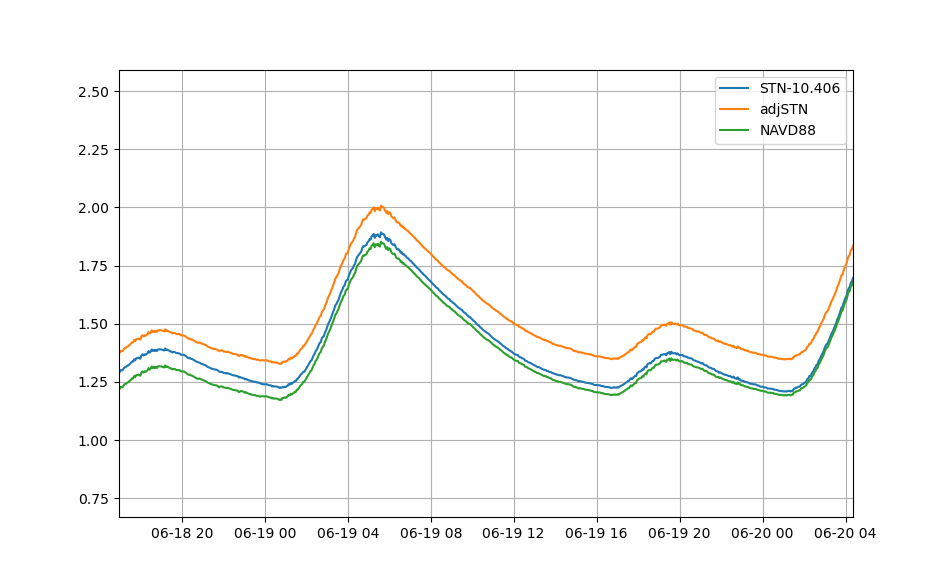

In [23]:
fig,ax=plt.subplots()
ax.plot(nck_wll_stn.time, nck_wll_stn['depth m']-10.406,label='STN-10.406')
ax.plot(nck_wll_navd88.time, nck_wll_navd88['depth m'],label='adjSTN')
ax.plot(nck_wll_stn.time, nck_wll_navd88['NAVD88'],label='NAVD88')
ax.legend()

<IPython.core.display.Javascript object>


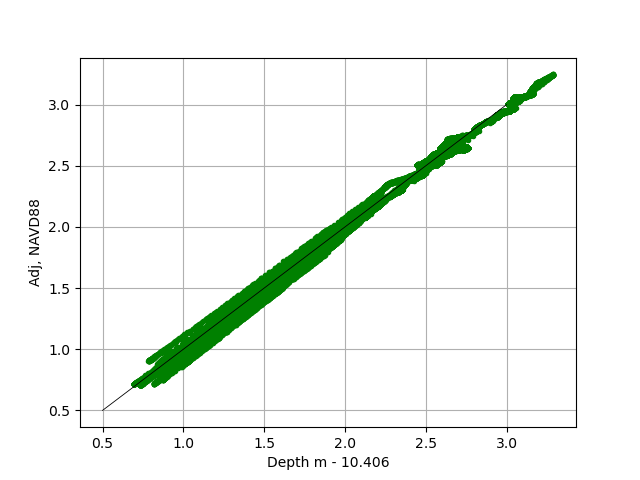

In [27]:
fig,ax=plt.subplots()
ax.plot(nck_wll_stn['depth m']-10.406,
        nck_wll_navd88['NAVD88'],'g.')
ax.set_xlabel('Depth m - 10.406')
ax.set_ylabel('Adj, NAVD88')
ax.plot([0.5,3.],[0.5,3],'k-',lw=0.6)

In [59]:
# Does this tell us much about propagation of WL through the system?
def loader(stn):
    df=pd.read_csv(f"../../data/BML data/2016/water_level/elevationNAVD88/2016_{stn}_wll_referenced_concat.csv")
    df['time']=pd.to_datetime( df[ ['year','month','day','hour','minute','second']])
    
    df['depth m raw']=df['depth m']
    df['depth m']=df['NAVD88']
    df['stn']=stn
    # BC3 has 1 day of data that is repeated. Values are slightly different on the two
    # copies, too...
    df=df.drop_duplicates(subset=['time'])
    return df
nck=loader('NCK')
pc3=loader('PC3')
ch2=loader('CH2')
bc3=loader('BC3')


<IPython.core.display.Javascript object>


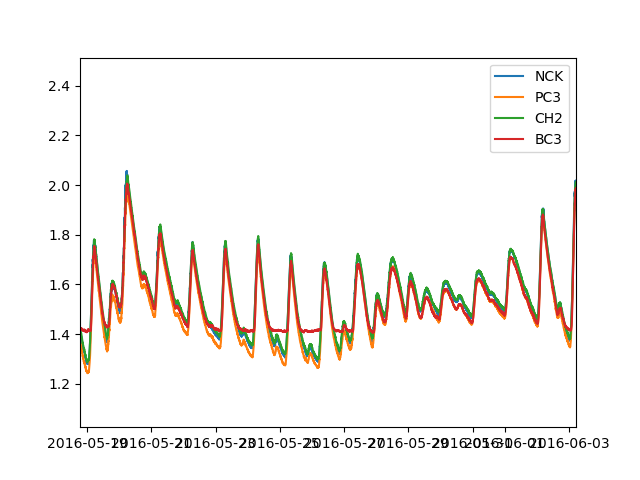

In [60]:
fig,ax=plt.subplots()
ax.plot(nck.time,nck['depth m'],label='NCK')
ax.plot(pc3.time,pc3['depth m'],label='PC3')
ax.plot(ch2.time,ch2['depth m'],label='CH2')
ax.plot(bc3.time,bc3['depth m'],label='BC3')
ax.legend()

In [ ]:
fig,ax=plt.subplots()
ax.plot(nck.time,nck['depth m'],label='NCK')
ax.plot(pc3.time,pc3['depth m'],label='PC3')
ax.plot(ch2.time,ch2['depth m'],label='CH2')
ax.plot(bc3.time,bc3['depth m'],label='BC3')
ax.legend()

In [65]:
# Put those on a common time line
# some stations are at 3 minutes, some at 5 minutes.
# Interpolate within +-5 minutes down to 3 minutes
combined=pd.concat([nck,pc3,ch2,bc3]).set_index(['time','stn'])
del combined['year']
del combined['month']
del combined['day']
del combined['hour']
del combined['minute']
del combined['second']
del combined['pressraw']
del combined['NAVD88']
del combined['depth m raw']
combined=combined.unstack()
combined=combined.resample('180S').mean()
combined=combined.interpolate(limit=4)
combined.head()

temp degC                  depth m                  
stn                       BC3      CH2 NCK PC3     BC3       CH2 NCK PC3
time                                                                    
2016-02-09 23:54:00       NaN  12.6900 NaN NaN     NaN  1.467390 NaN NaN
2016-02-09 23:57:00       NaN  12.2060 NaN NaN     NaN  1.461843 NaN NaN
2016-02-10 00:00:00       NaN  11.7220 NaN NaN     NaN  1.456295 NaN NaN
2016-02-10 00:03:00       NaN  11.5280 NaN NaN     NaN  1.448226 NaN NaN
2016-02-10 00:06:00       NaN  11.4795 NaN NaN     NaN  1.443688 NaN NaN

<IPython.core.display.Javascript object>


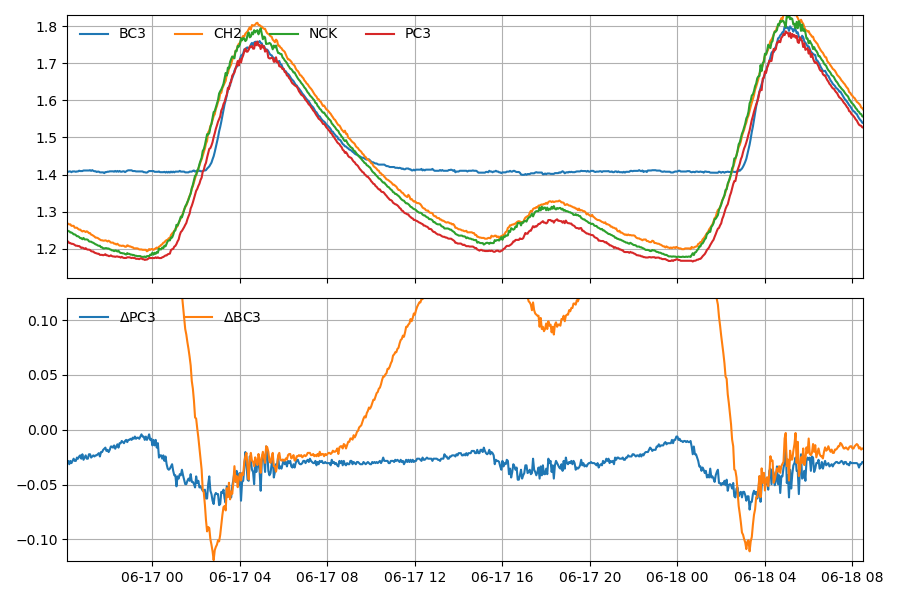

In [105]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(9,6))
for stn in ['BC3','CH2','NCK','PC3']:
    axs[0].plot(combined.index.values,combined[('depth m',stn) ],label=stn)
    
axs[1].plot(combined.index.values, combined[('depth m','PC3')] - combined[('depth m','NCK')],
            label="$\Delta$PC3")
axs[1].plot(combined.index.values, combined[('depth m','BC3')] - combined[('depth m','NCK')],
            label="$\Delta$BC3")


axs[0].legend(ncol=4,loc='upper left',frameon=False)
axs[1].legend(ncol=2,loc='upper left',frameon=False)
axs[0].axis((16968.838, 16970.3536, 1.121150229681183, 1.8297896650494634))
axs[1].axis(ymin=-0.12,ymax=0.12)
axs[0].grid()
axs[1].grid()
fig.tight_layout()

In [104]:
axs[0].axis()

(16968.83876589135, 16970.353660871395, 1.1292271711639306, 1.8378666065322107)

In [87]:
# Load a recent history file, see how the gradients compare.
his=xr.open_dataset('data_mouth_v013/DFM_OUTPUT_flowfm/flowfm_0000_his.nc')

In [96]:
his['stations']=('stations',), [s.decode() for s in his['station_name'].values]

<IPython.core.display.Javascript object>


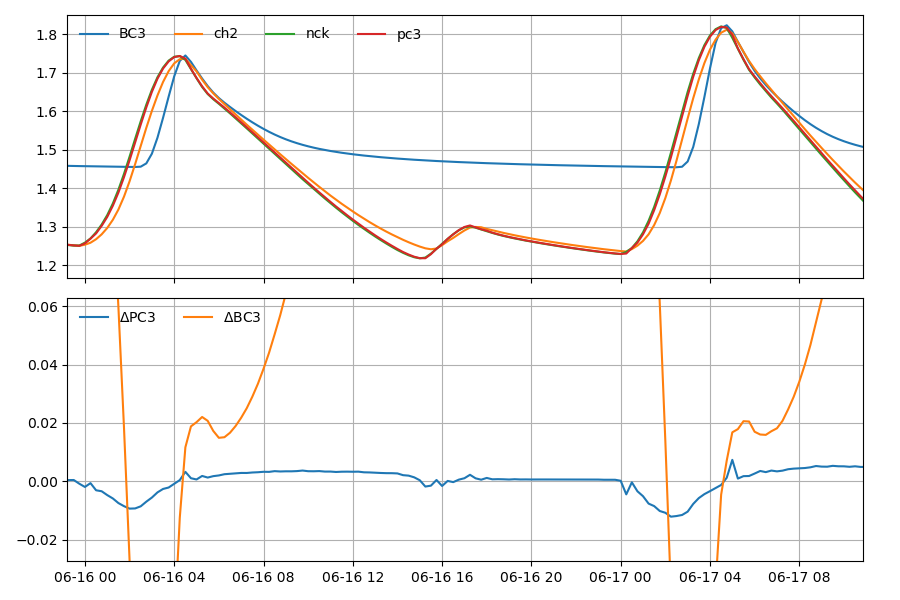

In [106]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(9,6))
for stn in ['BC3','ch2','nck','pc3']:
    axs[0].plot(his.time,his.waterlevel.sel(stations=stn),label=stn)
    
axs[1].plot(his.time, his.waterlevel.sel(stations='pc3') - his.waterlevel.sel(stations='nck'),
            label="$\Delta$PC3")
axs[1].plot(his.time, his.waterlevel.sel(stations='BC3') - his.waterlevel.sel(stations='nck'),
            label="$\Delta$BC3")

axs[0].legend(ncol=4,loc='upper left',frameon=False)
axs[1].legend(ncol=2,loc='upper left',frameon=False)
axs[0].axis((16968.838, 16970.3536, 1.121150229681183, 1.8297896650494634))
axs[1].axis(ymin=-0.12,ymax=0.12)
axs[0].grid()
axs[1].grid()
fig.tight_layout()

<xarray.DataArray 'waterlevel' (time: 385)>
array([1.552772, 1.571082, 1.594078, ..., 1.19174 , 1.189075, 1.187342])
Coordinates:
    station_x_coordinate  float64 5.524e+05
    station_y_coordinate  float64 4.124e+06
    station_name          |S64 b'nck'
  * time                  (time) datetime64[ns] 2016-06-14 ... 2016-06-18
    stations              <U18 'nck'
Attributes:
    standard_name:  sea_surface_height
    long_name:      water level
    units:          m
    geometry:       station_geom